In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from scipy.interpolate import griddata as gd
from pykrige.ok import OrdinaryKriging
from matplotlib import cm
import netCDF4 as nc
import scipy.io
import glob,csv
from IPython.display import Image
from mpl_toolkits.basemap import Basemap
%matplotlib inline

#Th_diss Interpolation (layer 20)

In [3]:
data=scipy.io.loadmat('/ocean/xiaoxiny/research/findk/All_Arctic-data/WLS/Th_diss.mat')
NEMO_dep=data['NEMO_dep']
Pa_diss=data['Th_diss']
lons=data['lons']
lats=data['lats']

In [4]:
layer=20
x=lons[layer,:]
y=lats[layer,:]
z=Pa_diss[layer,:]
x_ma=np.ma.masked_where(abs(x)<= 1e-200,x)
x_ma=np.ma.masked_where(np.isnan(x_ma),x_ma)
y_ma=np.ma.masked_where(abs(x)<= 1e-200,y)
y_ma=np.ma.masked_where(np.isnan(y_ma),y_ma)
z_ma=np.ma.masked_where(abs(z)<= 1e-200,z)
z_ma=np.ma.masked_where(np.isnan(y_ma),z_ma)

In [5]:
coordinate_name=glob.glob('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/test/EXP00/coordinates*.nc')
coordinate_obj=nc.Dataset(coordinate_name[0])
navlon=coordinate_obj.variables['nav_lon'][:]
navlat=coordinate_obj.variables['nav_lat'][:]

In [6]:
m = Basemap(projection='npstere',boundinglat=55,lon_0=0,resolution='l')
x_dis,y_dis = m(x_ma, y_ma)
x_lon,y_lat = m(navlon, navlat)
a,b=m(0,90)

In [7]:
#print x_ma.shape
#print nav_lat[147,50]
#print a,b

In [8]:
xx_lon=np.empty([149,182])
yy_lat=np.empty([149,182])
xx_dis=np.empty([len(x_dis)])
yy_dis=np.empty([len(x_dis)])

for j in range (182):
    for i in range (149):
        xx_lon[i,j]=x_lon[i,j]-a
        yy_lat[i,j]=y_lat[i,j]-b
        
xx_lon_ma=np.ma.masked_where(navlat<55,xx_lon)
yy_lat_ma=np.ma.masked_where(navlat<55,yy_lat)


for k in range (len(xx_dis)):
        xx_dis[k]=x_dis[k]-a
        yy_dis[k]=y_dis[k]-b        
xx_dis=np.ma.masked_where(np.isnan(xx_dis),xx_dis)
yy_dis=np.ma.masked_where(np.isnan(yy_dis),yy_dis)
z_ma=np.ma.masked_where(np.isnan(yy_dis),z_ma)


/home/xiaoxiny/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:3855: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


In [9]:
xxx_dis=xx_dis.compressed()
yyy_dis=yy_dis.compressed()
zzz_ma=z_ma.compressed()
print xxx_dis
print yyy_dis

[ 173859.81488695  343931.92437514  458902.5393971   259548.05453378
 -812992.78174402  192614.73013353  210294.99190145   79705.45158206
  333889.80458892  121914.65654541]
[ -409588.0562231   -572398.84506288  -763742.08071714  -968646.52652573
  1595588.17435067  -111206.16629248    72410.3726482    207639.8003129
  -578314.10567725  -769738.84742469]


In [40]:
what=np.empty([31,10,10])
            #layer,distance,variabce
whatt=np.empty([31,10,10])
def write_nc(layer):
        x=lons[layer,:]
        y=lats[layer,:]
        z=Pa_diss[layer,:]
        
        x_ma=np.ma.masked_where(abs(x)<= 1e-200,x)
        x_ma=np.ma.masked_where(np.isnan(x_ma),x_ma)
        y_ma=np.ma.masked_where(abs(y)<= 1e-200,y)
        y_ma=np.ma.masked_where(np.isnan(y_ma),y_ma)
        z_ma=np.ma.masked_where(abs(z)<= 1e-200,z)
        z_ma=np.ma.masked_where(np.isnan(y_ma),z_ma)
        m = Basemap(projection='npstere',boundinglat=55,lon_0=0,resolution='l')
        x_dis,y_dis = m(x_ma, y_ma)
        x_lon,y_lat = m(navlon, navlat)
        a,b=m(0,90)
        
        xx_lon=np.empty([149,182])
        yy_lat=np.empty([149,182])
        xx_dis=np.empty([len(x_dis)])
        yy_dis=np.empty([len(x_dis)])

        for j in range (182):
            for i in range (149):
                xx_lon[i,j]=x_lon[i,j]-a
                yy_lat[i,j]=y_lat[i,j]-b
        
        xx_lon_ma=np.ma.masked_where(navlat<55,xx_lon)
        yy_lat_ma=np.ma.masked_where(navlat<55,yy_lat)

        xx_dis=np.ma.masked_where(np.isnan(xx_dis),xx_dis)
        yy_dis=np.ma.masked_where(np.isnan(yy_dis),yy_dis)
        z_ma=np.ma.masked_where(np.isnan(yy_dis),z_ma)
        
        for k in range (len(xx_dis)):
            xx_dis[k]=x_dis[k]-a
            yy_dis[k]=y_dis[k]-b        

        xxx_dis=xx_dis.compressed()
        yyy_dis=yy_dis.compressed()
        zzz_ma=z_ma.compressed()
        
        woww=np.empty([len(xxx_dis),len(xxx_dis)])
        wow=np.empty([len(xxx_dis),len(xxx_dis)])
        c=np.average(zzz_ma)
        for k in range (len(xxx_dis)):
            for j in range (len(xxx_dis)):
                woww[k,j]=((xxx_dis[k]-xxx_dis[j])**2+(yyy_dis[k]-yyy_dis[j])**2)**0.5
                wow[k,j]=c*(zzz_ma[k]-zzz_ma[j])**2
                
        what[layer,:,:]=wow[:,:]
        whatt[layer,:,:]=woww[:,:]

In [ ]:
for i in range (31):
    write_nc(i)

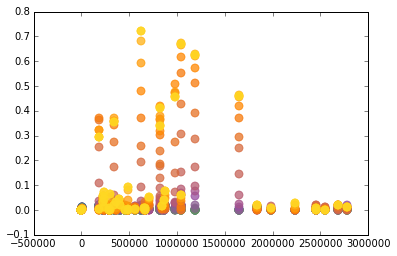

In [55]:
for i in range (31):
    #for j in range (10):
        #name=('layer%s'%i)
    plt.scatter(whatt[i,:,:],what[i,:,:],color=cm.Set1(i*5),label=name,s=60,alpha=0.5)  

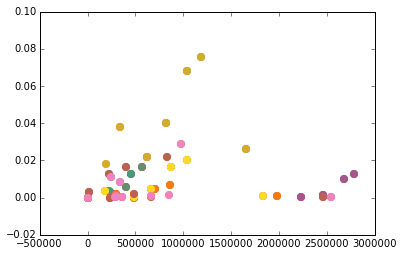

In [34]:
#test distance and the semivariance for all pairs of points
woww=np.empty([len(xxx_dis),len(xxx_dis)])
wow=np.empty([len(xxx_dis),len(xxx_dis)])
c=np.average(zzz_ma)
for k in range (len(xxx_dis)):
        for j in range (len(xxx_dis)):
            woww[k,j]=((xxx_dis[k]-xxx_dis[j])**2+(yyy_dis[k]-yyy_dis[j])**2)**0.5
            wow[k,j]=c*(zzz_ma[k]-zzz_ma[j])**2
        
for i in range (len(xxx_dis)):
    name=('centre: point%s'%i)
    plt.scatter(woww[i],wow[i],color=cm.Set1(i*25),label=name,s=50)
    #plt.legend(loc=0,fontsize=8)

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Using 'linear' Variogram Model
Slope: 3.12396726825e-08
Nugget: 0.000952838031365 



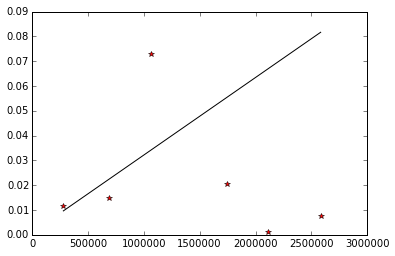

Calculating statistics on variogram model fit...
Q1 = 0.398061248263
Q2 = 1.50091279521
cR = 0.0229465158024 

Executing Ordinary Kriging...



In [12]:
OK = OrdinaryKriging(xxx_dis,yyy_dis, zzz_ma, variogram_model='linear', verbose=True, enable_plotting=True)
Pa_interp, ss = OK.execute('points',xx_lon, yy_lat)
Pa_interp=Pa_interp.reshape(149,182)

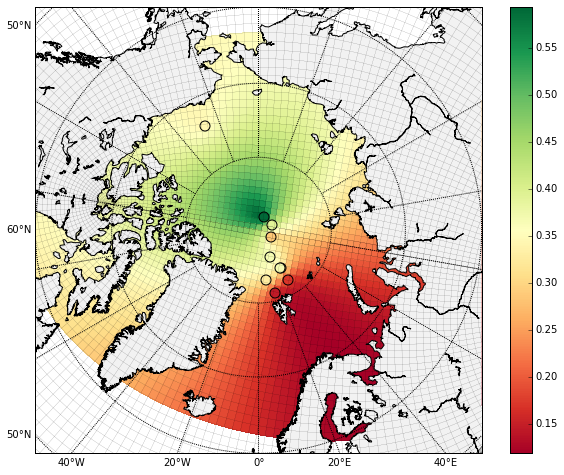

In [13]:
fig=plt.figure(figsize=(10, 10)); ax=plt.gca()
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.95')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])

x_maa=x_ma.compressed()
y_maa=y_ma.compressed()
z_maa=z_ma.compressed()

x,y = m(navlon, navlat)
plt.plot(x,y,x.T,y.T,color='k',linewidth=0.1)
CS = m.pcolor(x[120:-1,:],y[120:-1,:],Pa_interp[120:-1,:],cmap=plt.cm.RdYlGn)
#plt.clim(np.min(z_maa),np.max(z_maa))
CBar = plt.colorbar(CS,shrink=0.8)

for j in range(len(x_maa)):
    x2,y2= m(x_maa[j], y_maa[j])
    cmm = plt.cm.get_cmap('RdYlGn')
    #m.scatter(x2,y2,c=z_maa[j],vmin=np.min(z_maa),vmax=np.max(z_maa),cmap=cmm,s=100)
    m.scatter(x2,y2,c=z_maa[j],vmin=np.min(Pa_interp),vmax=np.max(Pa_interp),cmap=cmm,s=100)
plt.show()

###compare zzz_ma(original data) with the interp.

In [12]:
print zzz_ma.max()
print zzz_ma.min()
print zzz_ma

0.62498366122
0.145868122708
[ 0.36743511  0.27552282  0.17029255  0.14586812  0.34335912  0.28651109
  0.392       0.62498366  0.36775192  0.33007608]


In [13]:
print Pa_interp.max()
print Pa_interp.min()

0.593741734163
0.118420780296


##write nc file

In [70]:
#write a nc file
xmax = navlon.shape[1]
ymax = navlon.shape[0]
nemo = nc.Dataset('test.nc', 'w')
nemo.description = 'Initial part. Th value' 

# dimensions
nemo.createDimension('x', xmax)
nemo.createDimension('y', ymax)
nemo.createDimension('time_counter', None)

# variables
# latitude and longitude
nav_lat2 = nemo.createVariable('nav_lat','float32',('y','x'),zlib=True)
nav_lat[:,:] = navlat
nav_lon2 = nemo.createVariable('nav_lon','float32',('y','x'),zlib=True)
nav_lon[:,:] = navlon
# time
time_counter = nemo.createVariable('time_counter', 'float32', ('time_counter'),zlib=True)
time_counter.units = 'non-dim'
time_counter[0] = 1
#Pa
Th_part = nemo.createVariable('Th_part', 'float32', ('time_counter','y','x'), zlib=True)
Th_part[0,:,:] = Pa_interp
nemo.close()
#test nc file
coordinate_name=glob.glob('/ocean/xiaoxiny/research/analysis/Cindy Yu/*.nc')
coordinate_obj=nc.Dataset(coordinate_name[0])
navlon=coordinate_obj.variables['nav_lon'][:]
Th_part=coordinate_obj.variables['Th_part'][:]
print Th_part[0,0,0:20]

[ 0.151934    0.15483701  0.15783583  0.16092652  0.16410518  0.16736765
  0.17070977  0.17412731  0.17761585  0.18117099  0.18478823  0.18846296
  0.19219059  0.19596641  0.19978569  0.20364366  0.20753554  0.21145646
  0.2154016   0.21936607]


##grid(Draft)

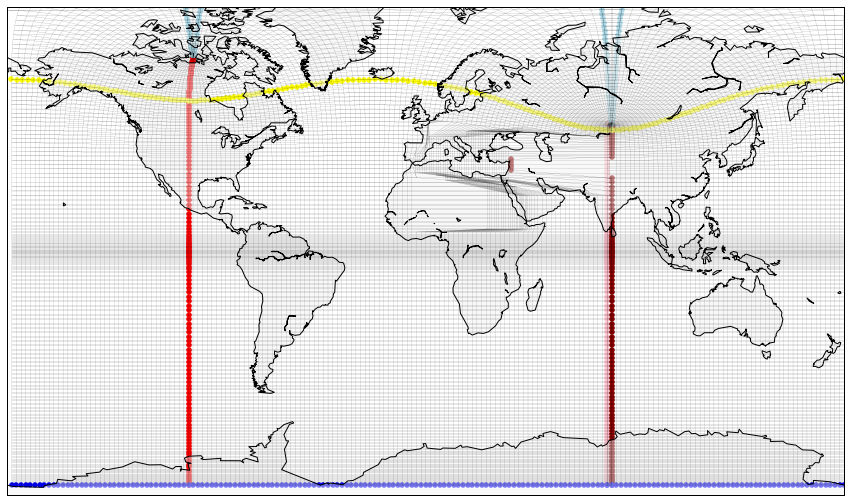

In [27]:
fig=plt.figure(figsize=(15, 10)); 
#m = Basemap(projection='npstere',boundinglat=0,lon_0=0,resolution='l')
m=Basemap(llcrnrlon=-180,llcrnrlat=-80,urcrnrlon=180,urcrnrlat=80,projection='mill')
m.drawcoastlines()
m.fillcontinents(color = '0.95',alpha=0.5)
x_lon,y_lat = m(nav_lon, nav_lat)
plt.plot(x_lon,y_lat,x_lon.T,y_lat.T,color='black',linewidth=0.09)
m.scatter(x_lon[:,0],y_lat[:,0],color='pink')
m.scatter(x_lon[:,90],y_lat[:,90],color='r')
m.scatter(x_lon[:,181],y_lat[:,181],color='darkred')

m.scatter(x_lon[120,:],y_lat[120,:],color='yellow')
m.scatter(x_lon[0,:],y_lat[0,:],color='blue')
m.scatter(x_lon[148,:],y_lat[148,:],color='lightblue')
#m.scatter(x_lon[-1,0:45],y_lat[-1,0:45],color='orange')

plt.show()

In [22]:
print nav_lat.shape

(149, 182)
